<a href="https://colab.research.google.com/github/stefanoridolfi/Coding_ML/blob/master/percp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

pesi iniziali [0.15911468926543293, 0.08258040899023089, -0.25304588479998835]
Parametri inizial m, q: -1.926784950704905 3.0642362746099163
Iterazione: 0 Errori: 2388
Iterazione: 1 Errori: 2099
Iterazione: 2 Errori: 1965
Iterazione: 3 Errori: 1829
Iterazione: 4 Errori: 1665
Iterazione: 5 Errori: 1667
Iterazione: 6 Errori: 1539
Iterazione: 7 Errori: 1370
Iterazione: 8 Errori: 1331
Iterazione: 9 Errori: 1336
Iterazione: 10 Errori: 1282
Iterazione: 11 Errori: 1212
Iterazione: 12 Errori: 1083
Iterazione: 13 Errori: 1114
Iterazione: 14 Errori: 1066
Iterazione: 15 Errori: 1022
Iterazione: 16 Errori: 1000
Iterazione: 17 Errori: 982
Iterazione: 18 Errori: 931
Iterazione: 19 Errori: 911
Iterazione: 20 Errori: 889
Iterazione: 21 Errori: 890
Iterazione: 22 Errori: 932
Iterazione: 23 Errori: 770
Iterazione: 24 Errori: 849
Iterazione: 25 Errori: 782
Iterazione: 26 Errori: 807
Iterazione: 27 Errori: 776
Iterazione: 28 Errori: 878
Iterazione: 29 Errori: 739
Iterazione: 30 Errori: 719
Parametri final

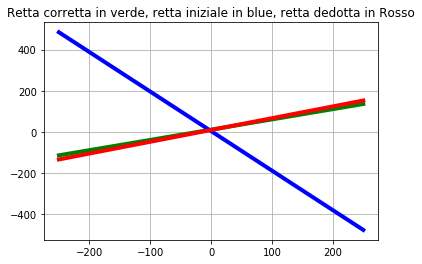

In [45]:
 import matplotlib.pyplot as pl
 import random
 # genera la retta di riferimento, com m=0.5 e q=10
 def f(x):
   return 0.5*x + 10 # linea retta: f(x) = 0.5x + 10



 # Activation function
def activate(num):
  if num > 0:
    return 1
  else:
   return -1        

# genero pesi
weights = []
weights_start = []
for x in range(0, 3):
  weights.append(random.random()*2-1)
  weights_start.append(weights[x])
print("pesi iniziali",weights_start )
print("Parametri inizial m, q:",-weights_start[0]/weights_start[1],-weights_start[2]/weights_start[1])


n=100000
it=30
speed=0.01
for i in range(0,it+1):
            errTot = 0 # Il conteggio degli errori riparte da zero
            for x in range(0, n ):
                # Generiamo un punto a caso nel range di coordinate -250 +250 
                x_coord = random.random()*500-250
                y_coord = random.random()*500-250
                inputs=[x_coord, y_coord, 1]
                # Verifichiamo il reale posizionamento del punto rispetto alla retta
                line_y = f(x_coord)
                if y_coord > line_y: # Il punto è sopra la linea: valore atteso = 1
                    desired_output = 1
                else: # Il punto è sopra la linea: valore atteso = -1
                    desired_output = -1
                # Chiamiamo la funzione di back propagation e incrementiamo il conteggio errori
                sum = 0
                for x in range(0, len(weights)):
                  sum += weights[x] * inputs[x]
        
                guess = activate(sum)   # Calcolo il valore di output relativo agli input forniti
                error = desired_output - guess      # Calcolo l'errore come differenza tra valore in output e valore atteso
                # La correzione dei pesi avviene secondo la formula
                # peso = peso + errore*valore_input*learn_speed
                # se l'errore è pari a zero la formula non altera il valore del peso
                for x in range(0, len(weights)):
                  weights[x] += error*inputs[x]*speed
                #print("Addestramento in corso, m, q  :",-self.weights[0]/self.weights[1],-self.weights[2]/self.weights[1] )
                # Restituiamo 0 se la previsione è stata corretta, 1 altrimenti
                # questo dato servirà più avanti per conteggiare gli errori durante il processo di apprendimento
                if error != 0:
                   errTot+=1
                
            # Al termine del sottociclo di punti visualizziamo il valore del contatore errori
            print("Iterazione:",i,"Errori:",errTot)

print("Parametri finali a, b , c della retta :",weights[0], weights[1], weights[2])
print("Parametri corretti: m=0.5  q=10\nParametri ottenuti:",-weights[0]/weights[1],-weights[2]/weights[1])


# Disegno la retta corretta 
import matplotlib.pyplot as pl
lx=[]
ly=[]
for x in range(-250,251):
  y=f(x)
  lx.append(x)
  ly.append(y)
pl.plot(lx,ly, color='green',linewidth=4.0)

# disegno la retta i cui coefficienti sono i pesi iniziali + il BIAS
import matplotlib.pyplot as pl
llx=[]
lly=[]
for x in range(-250,251):
  y=(-weights_start[0]/weights_start[1])*x -(weights_start[2]/weights_start[1])
  llx.append(x)
  lly.append(y)
pl.plot(llx,lly,color='blue',linewidth=4.0)



# disegno la retta i cui coefficienti sono i pesi finali + il BIAS
import matplotlib.pyplot as pl
llx=[]
lly=[]
for x in range(-250,251):
  y=(-weights[0]/weights[1])*x -(weights[2]/weights[1])
  llx.append(x)
  lly.append(y)
pl.plot(llx,lly,color='red',linewidth=4.0)
pl.title("Retta corretta in verde, retta iniziale in blue, retta dedotta in Rosso")
pl.grid(True)
pl.show()